## Simple Linear Model for Predicting MNIST data

by Irwing Dsouza

### Introduction

We create a simple linear model using TensorFlow to predict handwritten digits in the MNIST data set

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'1.3.0'

## Load the Data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
data=input_data.read_data_sets("./MNIST_data/",one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


Check the Counts

In [10]:
print("Size of ")
print("1. Training Set  : ",len(data.train.labels))
print("2. Test Set      : ",len(data.test.labels))
print("3. Validaton Set : ",len(data.validation.labels))

Size of 
1. Training Set  :  55000
2. Test Set      :  10000
3. Validaton Set :  5000


The MNIST data set consists of 70,000 images split into the 3 parts as shown above

One hot encoding has been done on the data, where the lable has been converted into a vector of 1s and 0s of length 10 
where the presence of 1 in the ith place indicates the lable =i-1

for eg:

In [25]:
data.train.labels[1,:]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [27]:
data.train.labels[1,:].argmax()

3

Here a 1 in the 4th column indicates the number in the image is (4-1) = 3


We prove this by viewing the image file

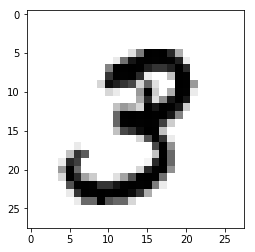

In [30]:
plt.imshow(data.train.images[1].reshape(28,28),cmap='binary')


Create a function to print images

In [51]:
def draw_imgs(imgs,predicted=None):
    fig, axes = plt.subplots(3, 3)
    
    for i,ax in enumerate(axes.flat):
        ax.imshow(imgs[i].reshape(28,28), cmap='binary')        
        ax.set_xticks([])
        ax.set_yticks([])
        
        if predicted is None:
            xlabel=' '
        else:
            xlabel = "Predicted: ", predicted[i]
        
        ax.set_xlabel(xlabel)

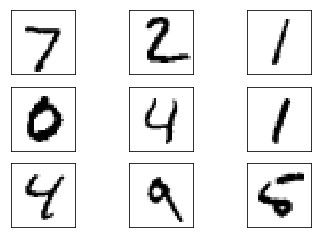

In [52]:
draw_imgs(data.test.images[0:9])

## Placeholders

Placeholders are "variables" that serve as an input to the TensorFlow graph that changes as the graph is executed, this is known as "feeding" the graph. we first define the input images as placehoders.

In [53]:
x=tf.placeholder(tf.float32,[None,784])

Here the shape given for x is None x 784, this is because :

None -> we are going to feed in the i/p in batches

784 -> images are of size 28x28 =784 which has been flattened

In [54]:
y_true=tf.placeholder(tf.float32,[None,10])

Here we have diemnsions of None x 10 because

None -> we have batches

10 -> we have 10 classes

## Variables

Variables are what tensorflow tweaks to optimise the model , in this case since we are doing a simple linear fit, we only have 2 variables the weight and the bias

In [56]:
weights=tf.Variable(tf.zeros([784,10]))

We initialised the weight to 784 (for the same reason as earlier) by 10 for the 10 classes

In [57]:
biases=tf.Variable(tf.zeros([10]))

we need one bias term for each class

## Model

In [58]:
Y=tf.matmul(x,weights)+biases

Once the above model is evalutaed it will return a 10 column matrix with one row for each class, where each column is an estimate of how likely that Y is to belong to that class. Since this o/p is a little difficult to interpret we use the softmax function , a commonly used function in multi variate classification to normalise it 

In [59]:
y_pred = tf.nn.softmax(Y)

The predicted class can be calculated from the y_pred matrix by taking the index of the largest element in each row.

In [61]:
y_class=tf.argmax(y_pred,1)